In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import testdownload

In [39]:
# task 1, download data
start_date = '2014-01-01'
end_date = '2018-12-31'
xml_filename = 'DailyTreasuryYieldCurveRateData.xml'

hist_data = testdownload.ParseTreasuryYields(start_date, end_date, xml_filename)
hist_data.to_csv('current_yield_level.csv')
hist_data.tail()

1


,BC_6MONTH,BC_1YEAR,BC_2YEAR,BC_3YEAR,BC_5YEAR,BC_7YEAR,BC_10YEAR,BC_20YEAR,BC_30YEAR
NEW_DATE,,,,,,,,,
2018-12-21,2.54,2.62,2.63,2.61,2.64,2.72,2.79,2.92,3.03
2018-12-24,2.52,2.61,2.55,2.56,2.58,2.66,2.74,2.88,3.00
2018-12-26,2.54,2.61,2.61,2.60,2.67,2.74,2.81,2.94,3.06
2018-12-27,2.49,2.58,2.56,2.55,2.60,2.68,2.77,2.92,3.05
2018-12-28,2.48,2.57,2.52,2.50,2.56,2.63,2.72,2.89,3.04


In [3]:
# task 2, calculate correlation matrix 
yield_return = (hist_data - hist_data.shift(1))/ 100

mu = yield_return.mean()
stddev = yield_return.std(ddof=1)

In [4]:
yield_return_standardized = (yield_return - mu) / stddev
yield_return_standardized 

,BC_6MONTH,BC_1YEAR,BC_2YEAR,BC_3YEAR,BC_5YEAR,BC_7YEAR,BC_10YEAR,BC_20YEAR,BC_30YEAR
NEW_DATE,,,,,,,,,
2014-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03,0.196249,-0.043140,0.322485,0.578972,0.113188,0.105281,0.102821,0.093508,0.086663
2014-01-06,-0.531816,-0.263967,-0.206334,-0.320824,-0.372208,-0.430564,-0.299446,-0.258273,-0.237172
2014-01-07,-0.046439,0.177687,-0.030061,0.279040,-0.129510,-0.109057,-0.198879,-0.170328,-0.156213
2014-01-08,-0.046439,-0.043140,0.498757,1.028871,0.962632,0.748295,0.505088,0.269398,0.167621
...,...,...,...,...,...,...,...,...,...
2018-12-21,-0.289128,-0.484794,-0.735152,-0.620756,-0.129510,-0.001888,0.002254,0.005563,0.086663
2018-12-24,-0.531816,-0.263967,-1.440243,-0.770722,-0.736256,-0.644902,-0.500579,-0.346218,-0.237172
2018-12-26,0.438938,-0.043140,1.027576,0.578972,1.083981,0.855464,0.706222,0.533234,0.491455


In [5]:
corr = yield_return_standardized.cov()
corr

,BC_6MONTH,BC_1YEAR,BC_2YEAR,BC_3YEAR,BC_5YEAR,BC_7YEAR,BC_10YEAR,BC_20YEAR,BC_30YEAR
BC_6MONTH,1.000000,0.912927,0.858098,0.848072,0.855678,0.864180,0.875723,0.881388,0.887923
BC_1YEAR,0.912927,1.000000,0.904725,0.898606,0.899543,0.903145,0.908982,0.909557,0.913119
BC_2YEAR,0.858098,0.904725,1.000000,0.972973,0.962963,0.951304,0.938188,0.916569,0.908447
BC_3YEAR,0.848072,0.898606,0.972973,1.000000,0.984358,0.973317,0.957306,0.931258,0.920989
BC_5YEAR,0.855678,0.899543,0.962963,0.984358,1.000000,0.992106,0.981486,0.960788,0.950558
BC_7YEAR,0.864180,0.903145,0.951304,0.973317,0.992106,1.000000,0.993093,0.979259,0.970860
BC_10YEAR,0.875723,0.908982,0.938188,0.957306,0.981486,0.993093,1.000000,0.991973,0.986494
BC_20YEAR,0.881388,0.909557,0.916569,0.931258,0.960788,0.979259,0.991973,1.000000,0.996494
BC_30YEAR,0.887923,0.913119,0.908447,0.920989,0.950558,0.970860,0.986494,0.996494,1.000000


In [38]:
# task 3, calculate modified duration, yield volatility and bond price return volatility
# 1. modified duration
maturities = np.array([0.5, 1, 2, 3, 5, 7, 10, 20 ,30])
n = 1

modified_duration = maturities/(1 + hist_data / 100 / n)
modified_duration.to_csv('modified_duration.csv')
modified_duration

,BC_6MONTH,BC_1YEAR,BC_2YEAR,BC_3YEAR,BC_5YEAR,BC_7YEAR,BC_10YEAR,BC_20YEAR,BC_30YEAR
NEW_DATE,,,,,,,,,
2014-01-02,0.499550,0.998702,1.992230,2.977372,4.915454,6.835270,9.708738,19.290123,28.868360
2014-01-03,0.499500,0.998702,1.991833,2.976190,4.914971,6.834603,9.707795,19.288263,28.865583
2014-01-06,0.499600,0.998801,1.992032,2.976781,4.916421,6.837273,9.710623,19.293845,28.873917
2014-01-07,0.499600,0.998702,1.992032,2.976190,4.916904,6.837941,9.712510,19.297569,28.879476
2014-01-08,0.499600,0.998702,1.991437,2.974125,4.913039,6.833268,9.707795,19.291984,28.873917
...,...,...,...,...,...,...,...,...,...
2018-12-21,0.487615,0.974469,1.948748,2.923692,4.871395,6.814642,9.728573,19.432569,29.117733
2018-12-24,0.487710,0.974564,1.950268,2.925117,4.874244,6.818625,9.733307,19.440124,29.126214
2018-12-26,0.487615,0.974564,1.949128,2.923977,4.869972,6.813315,9.726680,19.428793,29.109257


In [35]:
# 2. yield volatility
yield_volatility = (yield_return.std() * np.sqrt(22)).to_frame().transpose() * 100
yield_volatility.index = ['yield volatility%']
yield_volatility.to_csv('yield_volatility.csv')
yield_volatility

,BC_6MONTH,BC_1YEAR,BC_2YEAR,BC_3YEAR,BC_5YEAR,BC_7YEAR,BC_10YEAR,BC_20YEAR,BC_30YEAR
yield volatility%,0.193269,0.212402,0.266089,0.312765,0.386523,0.437665,0.466398,0.533334,0.57936


In [9]:
# 3. bond price return volatility
face_value = 100
bond_prices = face_value / ((1 + hist_data / 100) ** maturities)
bond_prices_return = bond_prices / bond_prices.shift(1) - 1
bond_prices_return.tail()

,BC_6MONTH,BC_1YEAR,BC_2YEAR,BC_3YEAR,BC_5YEAR,BC_7YEAR,BC_10YEAR,BC_20YEAR,BC_30YEAR
NEW_DATE,,,,,,,,,
2018-12-21,0.000049,0.000195,0.000780,0.001170,0.000487,0.000000,0.000000,0.000000,-0.002908
2018-12-24,0.000098,0.000097,0.001561,0.001463,0.002928,0.004098,0.004877,0.007805,0.008775
2018-12-26,-0.000098,0.000000,-0.001169,-0.001169,-0.004375,-0.005438,-0.006788,-0.011593,-0.017319
2018-12-27,0.000244,0.000292,0.000975,0.001463,0.003416,0.004098,0.003899,0.003894,0.002915
2018-12-28,0.000049,0.000097,0.000780,0.001464,0.001952,0.003415,0.004878,0.005848,0.002916


In [37]:
bond_prices_volatility = (bond_prices_return.std() * np.sqrt(22)).to_frame().transpose() * 100
bond_prices_volatility.index = ['bond prices volatility%']
bond_prices_volatility.to_csv('bond_prices_volatility.csv')
bond_prices_volatility

,BC_6MONTH,BC_1YEAR,BC_2YEAR,BC_3YEAR,BC_5YEAR,BC_7YEAR,BC_10YEAR,BC_20YEAR,BC_30YEAR
bond prices volatility%,0.096117,0.211146,0.528293,0.930239,1.91388,3.037578,4.652056,11.186942,20.315473


In [11]:
# task 4, calculate eigen value, eigen vector
eigenvalues, eigenvectors = np.linalg.eigh(corr)

In [12]:
sorted_indices = np.argsort(-eigenvalues)
eigenvalues_sorted = eigenvalues[sorted_indices]
eigenvectors_sorted = eigenvectors[:,sorted_indices]


In [44]:
pd.DataFrame(eigenvalues_sorted, columns = ['eigenvalues'], index = ['PC'+str(i) for i in range(1, len(eigenvalues_sorted) + 1)]).to_csv('eigenvalues.csv')

In [49]:
pd.DataFrame(eigenvectors_sorted, columns = ['PC'+str(i) for i in range(1, len(eigenvalues_sorted) + 1)], index = hist_data.columns).to_csv('eigenvectors.csv')

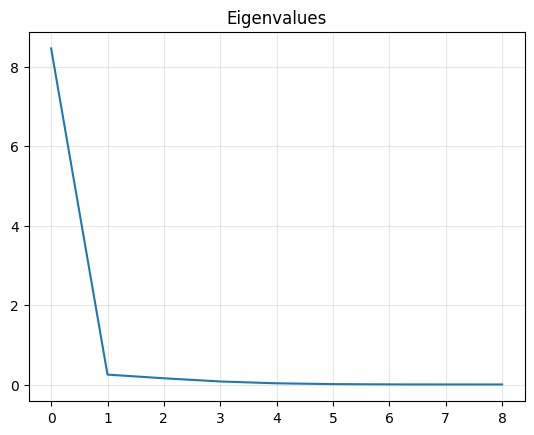

In [50]:
plt.plot(eigenvalues_sorted)
plt.title('Eigenvalues')
plt.grid(alpha = 0.3)

In [51]:
variance_explained_by_first_3_factors =(np.cumsum(eigenvalues_sorted) / np.sum(eigenvalues_sorted))[:3]
variance_explained_by_first_3_factors

array([0.93986678, 0.96770895, 0.98530891])

In [54]:
pd.DataFrame(variance_explained_by_first_3_factors, columns = ['variance explained'], index = ['PC1', 'PC2', 'PC3']).to_csv('variance_explained_by_first_3_factors.csv')

In [58]:
correlation_matrix_by_the_first_1_factors = pd.DataFrame(np.dot(eigenvectors_sorted[:, :1],np.dot(np.diag(eigenvalues_sorted[:1]), eigenvectors_sorted[:, :1].T)), columns = hist_data.columns, index = hist_data.columns)
correlation_matrix_by_the_first_2_factors = pd.DataFrame(np.dot(eigenvectors_sorted[:, :2],np.dot(np.diag(eigenvalues_sorted[:2]), eigenvectors_sorted[:, :2].T)), columns = hist_data.columns, index = hist_data.columns)

In [59]:
correlation_matrix_by_the_first_1_factors.to_csv('correlation_matrix_by_the_first_1_factors.csv')
correlation_matrix_by_the_first_2_factors.to_csv('correlation_matrix_by_the_first_2_factors.csv')

In [60]:
correlation_matrix_by_the_first_1_factors

,BC_6MONTH,BC_1YEAR,BC_2YEAR,BC_3YEAR,BC_5YEAR,BC_7YEAR,BC_10YEAR,BC_20YEAR,BC_30YEAR
BC_6MONTH,0.835046,0.863557,0.881436,0.889407,0.900086,0.904269,0.904827,0.897823,0.894332
BC_1YEAR,0.863557,0.893040,0.911530,0.919773,0.930816,0.935143,0.935720,0.928477,0.924866
BC_2YEAR,0.881436,0.911530,0.930402,0.938816,0.950088,0.954504,0.955093,0.947700,0.944015
BC_3YEAR,0.889407,0.919773,0.938816,0.947306,0.958680,0.963136,0.963730,0.956270,0.952552
BC_5YEAR,0.900086,0.930816,0.950088,0.958680,0.970190,0.974700,0.975302,0.967752,0.963989
BC_7YEAR,0.904269,0.935143,0.954504,0.963136,0.974700,0.979231,0.979835,0.972250,0.968469
BC_10YEAR,0.904827,0.935720,0.955093,0.963730,0.975302,0.979835,0.980440,0.972850,0.969067
BC_20YEAR,0.897823,0.928477,0.947700,0.956270,0.967752,0.972250,0.972850,0.965319,0.961565
BC_30YEAR,0.894332,0.924866,0.944015,0.952552,0.963989,0.968469,0.969067,0.961565,0.957827


In [56]:
# task 5, calculate monthly 95% portfolio VaR
weight = np.array([0, 40, 0, 0, 0, -100, 0, 50, 0]).reshape(-1, 1)
weight

array([[   0],
       [  40],
       [   0],
       [   0],
       [   0],
       [-100],
       [   0],
       [  50],
       [   0]])

In [57]:
# portfolio beta of first 3 factors
eigenvectors_sorted[:,:3]

array([[ 0.31419619, -0.74095004,  0.05363126],
       [ 0.32492349, -0.44676269,  0.22391722],
       [ 0.33165074,  0.15818232,  0.53291097],
       [ 0.3346499 ,  0.2681958 ,  0.38664339],
       [ 0.33866793,  0.27443715,  0.10621266],
       [ 0.34024213,  0.23200099, -0.09409963],
       [ 0.34045212,  0.14991919, -0.26234387],
       [ 0.33781663,  0.05144933, -0.44091978],
       [ 0.33650307, -0.01350932, -0.47971567]])

In [63]:
pd.DataFrame(eigenvectors_sorted[:,:3], columns = ['factor1', 'factor2', 'factor3']).to_csv('portfolio_beta_of_first_3_factors.csv')

In [64]:
# Calculate portfolio VaR of 1 factor model, and 2 factor model respectively

cov_by_the_first_1_factors = np.diag(stddev) @ correlation_matrix_by_the_first_1_factors @ np.diag(stddev)
cov_by_the_first_2_factors = np.diag(stddev) @ correlation_matrix_by_the_first_2_factors @ np.diag(stddev)

In [65]:
a = 1.96
VaR_by_the_first_1_factors = a * np.sqrt(weight.T @ cov_by_the_first_1_factors @ weight) * np.sqrt(22)
VaR_by_the_first_2_factors = a * np.sqrt(weight.T @ cov_by_the_first_2_factors @ weight) * np.sqrt(22)

In [66]:
print(VaR_by_the_first_1_factors.loc[0,0], VaR_by_the_first_2_factors.loc[0,0])

0.17797907581838573 0.2165755961275249


In [69]:
pd.DataFrame([VaR_by_the_first_1_factors.loc[0,0], VaR_by_the_first_2_factors.loc[0,0]], columns = ['VaR'], index = ['by first 1 factor', 'by first 2 factors']).to_csv('portfolio_VaR.csv')

In [70]:
beta_1p = (weight * stddev.values.reshape(-1, 1)).T @ eigenvectors_sorted[:,0]
beta_2p = (weight * stddev.values.reshape(-1, 1)).T @ eigenvectors_sorted[:,1]

In [71]:
print(beta_1p ** 2 * eigenvalues_sorted[0])
print(beta_1p ** 2 * eigenvalues_sorted[0] + beta_2p ** 2 * eigenvalues_sorted[1])

[0.0003748]
[0.00055499]
